# TELECOMMUNICATION INDUSTRY

Problem to be solved: predict the class of a new customer of a telecommunication provider, in case the company categorizes its customers into four groups, so as to predict group membership and customize offers for individual perspective customers.

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 


## The dataset

We have downloaded the customer dataset, teleCust1000t.csv, which contains demographic data, such as region, age, and marital of customers of a telecommunication company. [Dataset source](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2018/09/12/base-samples-for-ibm-cognos-analytics) 

These are the columns of the dataset:
- region
- tenure
- age
- marital
- address
- income
- ed
- employ
- retire
- gender
- reside
- custsat

The target field, called __custcat__, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


## Explore the dataset

Imported Pandas and Numpy library and then open the dataset which is in csv format using the pd.read_csv() method of Pandas. After that, check the first 5 rows of the dataframe.

In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_01cc527bb96d4bf4a425a055e527cada = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='b82ZZUzL652upPKrBDIIzVcumAE--dvhoXpzzes8FBFs',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_01cc527bb96d4bf4a425a055e527cada.get_object(Bucket='mlprojectsforvariousindustries-donotdelete-pr-cswviijcwiynz0',Key='teleCust1000t.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df = pd.read_csv(body)
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data cleaning

A quick check if there are null values on this dataset.

In [2]:
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'region', 'tenure', 'age', 'marital',
       'address', 'income', 'ed', 'employ', 'retire', 'gender',
       'reside', 'custcat']] = df[['region', 'tenure', 'age', 'marital',
       'address', 'income', 'ed', 'employ', 'retire', 'gender',
       'reside', 'custcat']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)


Shape of dataset before cleaning:  12000
Shape of dataset after cleaning:  12000


As we see there were no null values.

## Analysis of the data and Visualizations

Let’s see how many of each class is in our data set.

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

**281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers**
Explore the data using visualization techniques:

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca2bdf940>]],
      dtype=object)

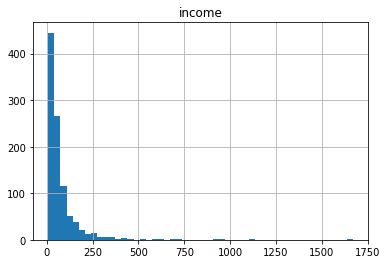

In [5]:
df.hist(column='income', bins=50)

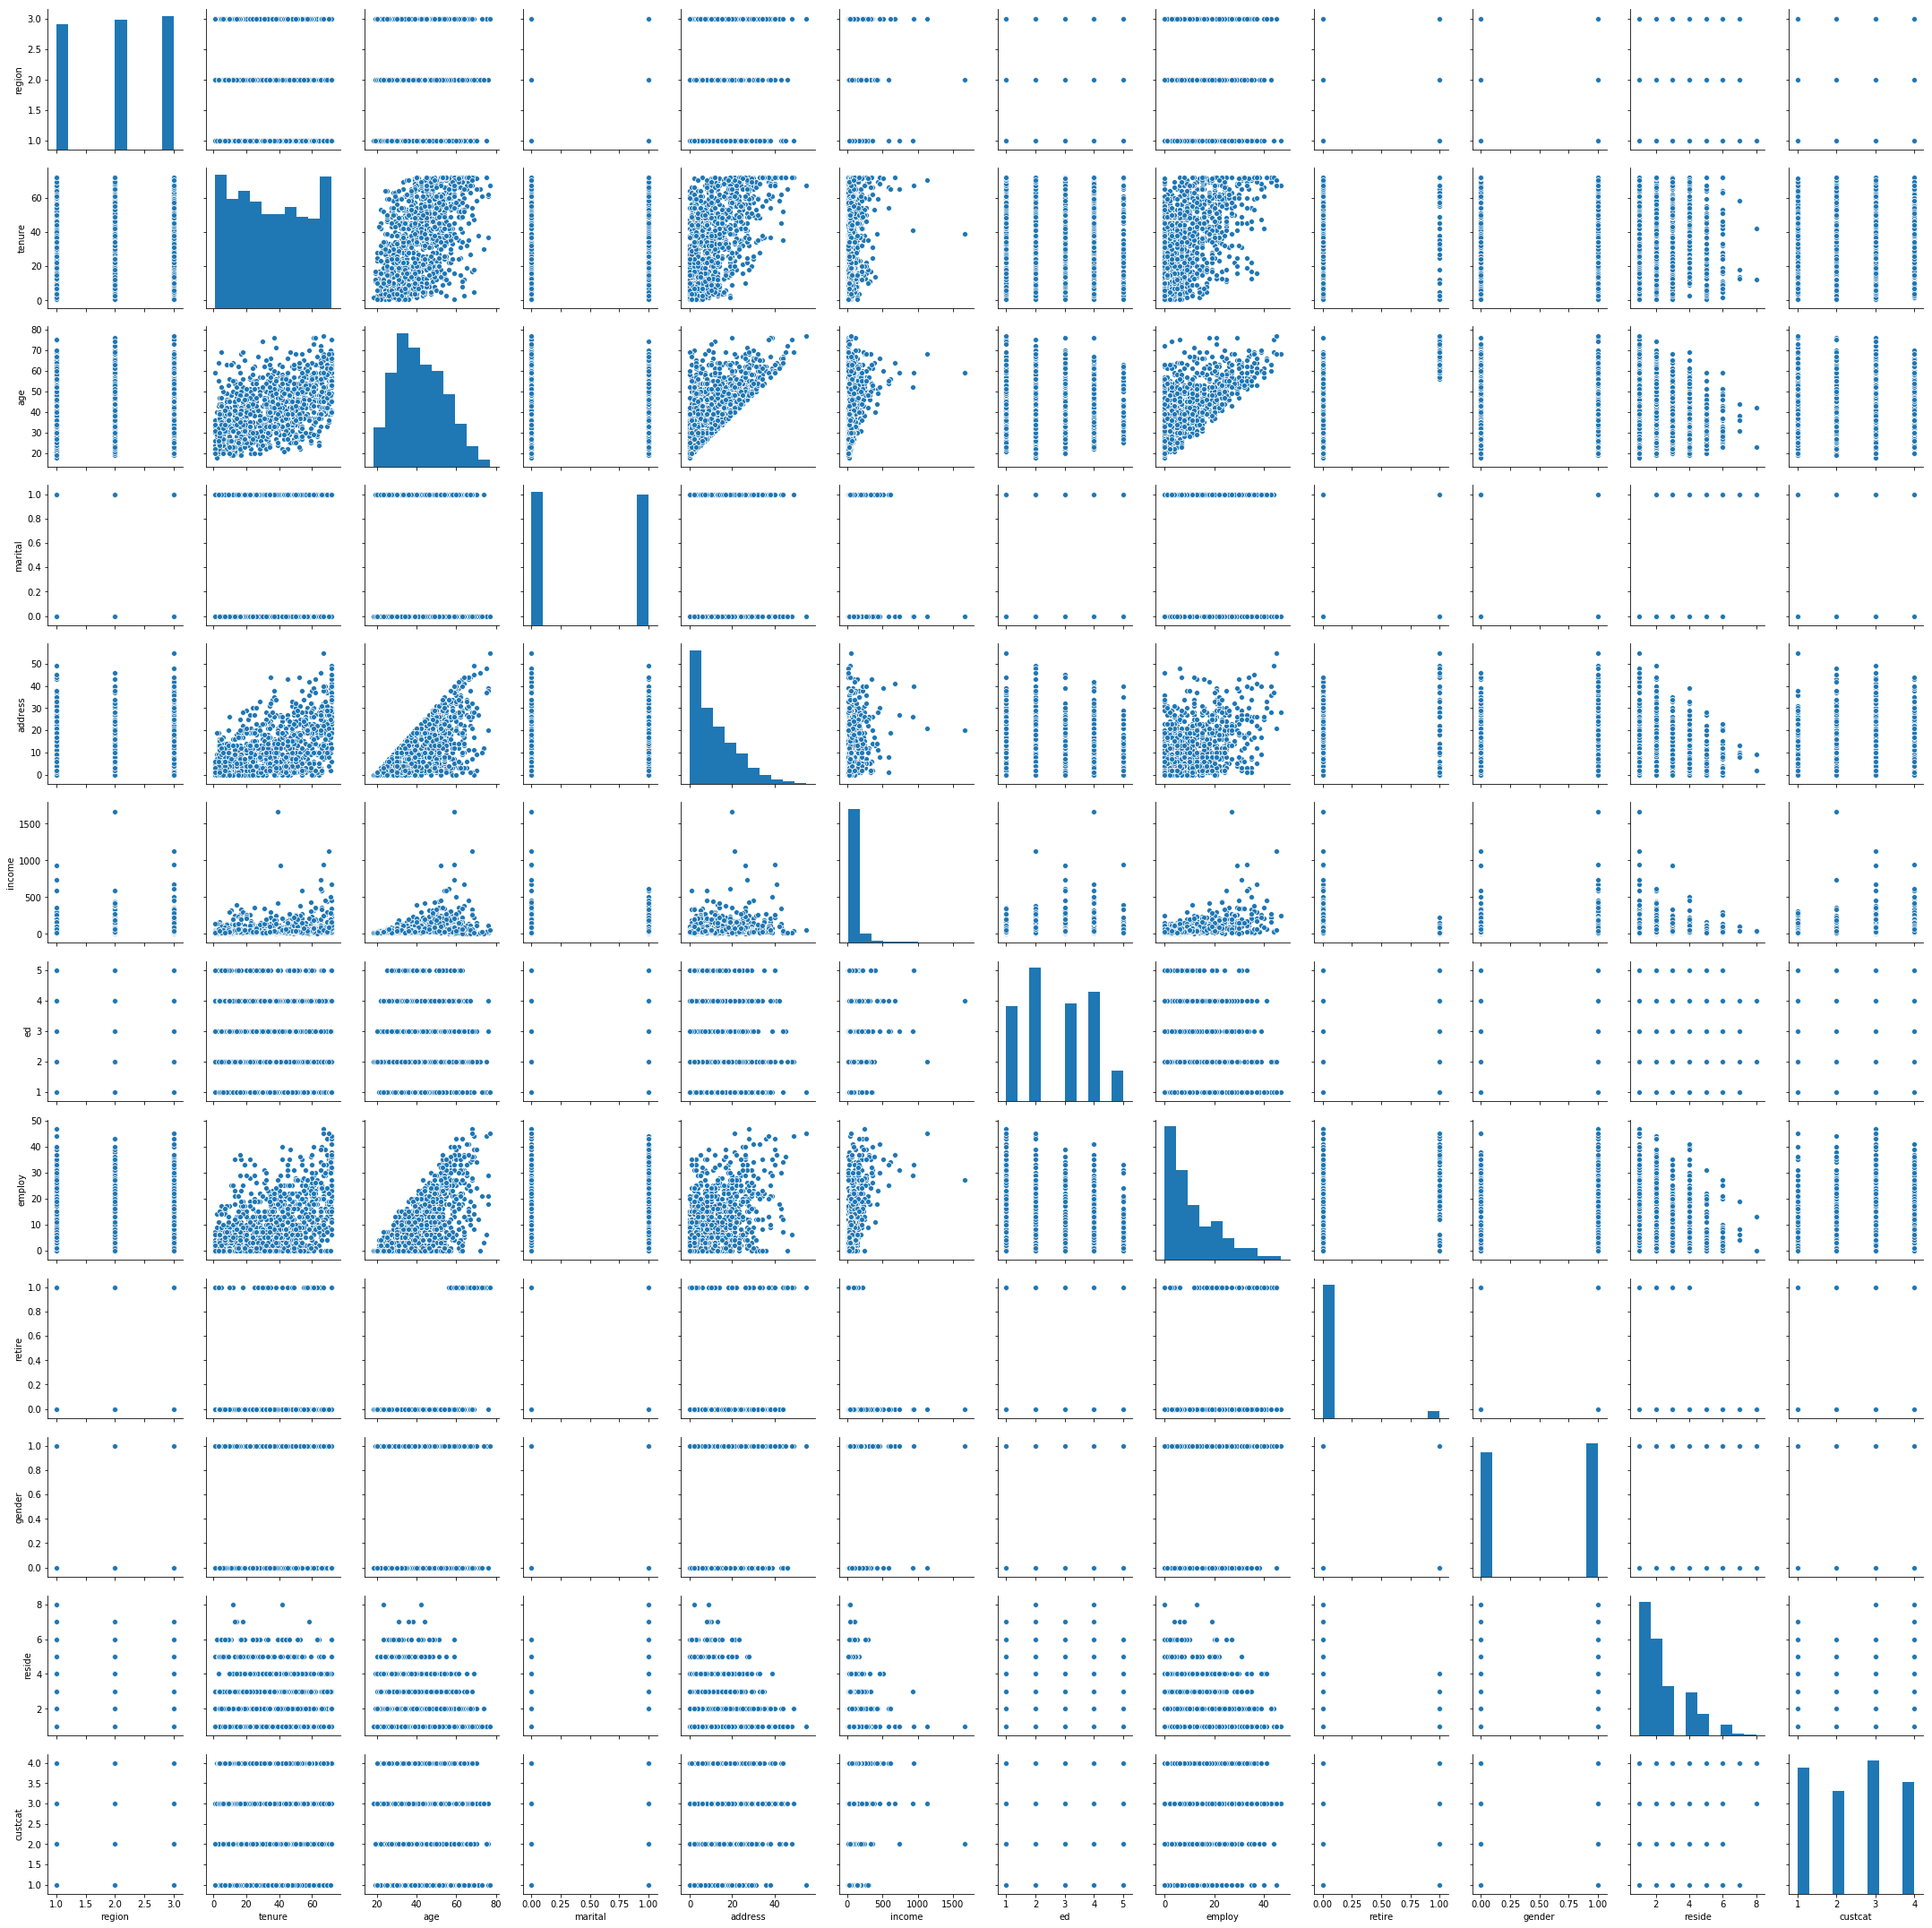

In [6]:
sns.pairplot(df)
plt.show()

As we see from these plots it is difficult to find linear correlations. It is a classification problem afterall.

Use **df.dtypes** method to check out the data type of each column in the dataset.

In [7]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

Use the **df.describe()** method, which computes the basic statistics for all continuous variables.

The result will contain the following things:

- the count or frequency.
- the mean or average.
- the standard deviation (std).
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value


In [8]:
df.describe()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


### Correlation

A mutual interdependence between two or more things is known as correlation. Check the Correlation between the continuous variables using the **df.corr()** method.


In [9]:
tmp = df.corr()
tmp

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


As we see there are no significant correlations between the variables.

Lets print the Heat Map as well.

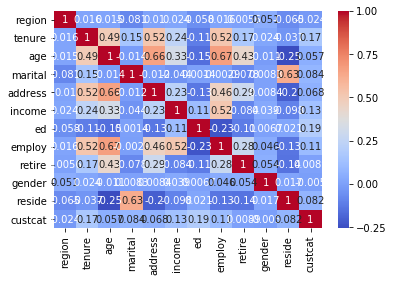

In [10]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### Feature set

Lets define feature sets, X:

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [12]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Also the labels.

In [13]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalize the data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification
### K nearest neighbor (KNN)
Import library

Classifier implementing the k-nearest neighbors vote.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

Lets start the algorithm with k=4 for now:


In [17]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

#### Predicting

We can use the model to predict the test set:

In [18]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

#### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [19]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Lets try for an other value of k, k=6.

In [20]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.


In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

Plot model accuracy for Different number of Neighbors.

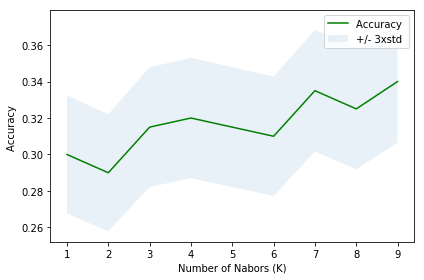

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


In [24]:
k = 9
neigh9 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat9 = neigh9.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh9.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat9))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [28]:
for i in y_test:
    print('Test data: ',y_test[i],'Predicted ->',yhat9[i])

Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 1
Test data:  1 Predicted -> 1
Test data:  1 Predicted -> 3
Test data:  4 Predicted -> 4
Test data:  4 Predicted -> 4
Test data:  2 Predicted -> 2
Test data:  1 Predicted -> 1
Test data:  2 Predicted -> 2
Test data:  4 Predicted -> 4
Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 3
Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 1
Test data:  4 Predicted -> 4
Test data:  2 Predicted -> 2
Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 3
Test data:  2 Predicted -> 2
Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 1
Test data:  1 Predicted -> 1
Test data:  1 Predicted -> 1
Test data:  2 Predicted -> 2
Test data:  4 Predicted -> 4
Test data:  4 Predicted -> 4
Test data:  4 Predicted -> 4
Test data:  1 Predicted -> 3
Test data:  4 Predicted -> 4
Test data:  2 Predicted -> 2
Test data:  1 Predicted -> 1
Test data:  1 Predicted -> 1
Test data:  4 Predicted -> 4
Test data:  2 Predicted -> 2
Test data:  4 

In [29]:
print('Where 1-Basic Service, 2-E-Service, 3-Plus Service, 4-Total Service')

Where 1-Basic Service, 2-E-Service, 3-Plus Service, 4-Total Service
